In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
with open('./basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('./basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [4]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.925,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9,
 0.8875,
 0.8625,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375]

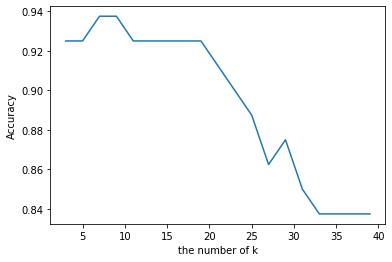

The best number of k : 7


In [5]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k : ' + str(k))


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]

y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [7]:
x_test = test[['3P', 'BLK']]

y_test = test[['Pos']]

pred = knn.predict(x_test)

comparison = pd.DataFrame(
{'prediction':pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,SG
1,SG,SG
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C


In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

digits = datasets.load_digits()

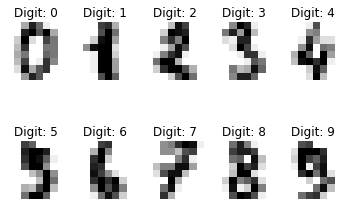

In [9]:
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5,label +1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))

plt.show()

In [10]:
flag_3_8 = (digits.target ==3) + (digits.target ==8)
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

In [11]:
images = images.reshape(images.shape[0], -1)

In [12]:
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
classifier.fit(images[:train_size], labels[:train_size])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [13]:
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
     accuracy_score(expected, predicted))
print('Confusion matrix:\n',
     confusion_matrix(expected, predicted))
print('Precision:\n',
     precision_score(expected, predicted, pos_label=3))
print('Recall:\n',
     recall_score(expected, predicted, pos_label=3))
print('F-score:\n',
     f1_score(expected, predicted, pos_label=3))

Accuracy:
 0.916083916083916
Confusion matrix:
 [[63 12]
 [ 0 68]]
Precision:
 1.0
Recall:
 0.84
F-score:
 0.9130434782608696


In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                             if x[1] >0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df
                                         

In [15]:
import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초 '.format(time.time() - start_time))


GBM 정확도: 0.9382
GBM 수행 시간: 682.6 초 


In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}\n'.format(grid_cv.best_score_))






Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 143.7min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9013



In [ ]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f\n'.format(grid_cv.best_score_))

In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score']]

In [ ]:
gb_pred = prid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))